In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Phishing_Mitre_Dataset_Summer_of_AI.csv")

df.head(10)

,create_age(months),expiry_age(months),update_age(days),URL,Label
0,-1,-1,-1,http://account-google-com.ngate.my/c44cca40176...,1
1,212,16,663,http://www.coffeespecialties.com/...,0
2,-1,-1,-1,http://black.pk/wp-content/2013/04/bp.postale/...,1
3,198,6,186,http://atomicsoda.com/manutd...,0
4,240,24,1684,http://bostoncoffeecake.com/...,0
5,-1,-1,-1,http://www.durst.de/...,0
6,98,10,57,http://www.jobofmine.com/...,0
7,2,10,61,http://safetem.com/fcid/login.php?cmd=login_su...,1
8,21,3,280,http://elicafe.com/...,1
9,-1,-1,-1,http://www.vgl.ucdavis.edu/informatics/strand....,0


Data Exploration

In [3]:
df.describe()

,create_age(months),expiry_age(months),update_age(days),Label
count,4799.000000,4799.000000,4799.000000,4799.000000
mean,91.288810,12.264430,272.264638,0.532403
std,92.868921,20.033764,618.276458,0.499001
min,-1.000000,-78.000000,-115.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,0.000000
50%,56.000000,7.000000,91.000000,1.000000
75%,188.000000,12.000000,292.500000,1.000000
max,365.000000,120.000000,9959.000000,1.000000


In [7]:
df["create_age(months)"].value_counts()

create_age(months)
-1      1434
 226      91
 3        77
 2        71
 4        40
        ... 
 23        1
 295       1
 141       1
 265       1
 274       1
Name: count, Length: 286, dtype: int64

In [8]:
df["expiry_age(months)"].value_counts()

expiry_age(months)
-1      1278
 9       269
 7       233
 5       228
 8       223
        ... 
 91        1
 87        1
 104       1
 120       1
-78        1
Name: count, Length: 119, dtype: int64

update_age(days)
-1       1476
 8         84
 46        28
 60        28
 269       24
         ... 
 524        1
 1562       1
 679        1
 3165       1
 745        1
Name: count, Length: 885, dtype: int64


<Axes: >

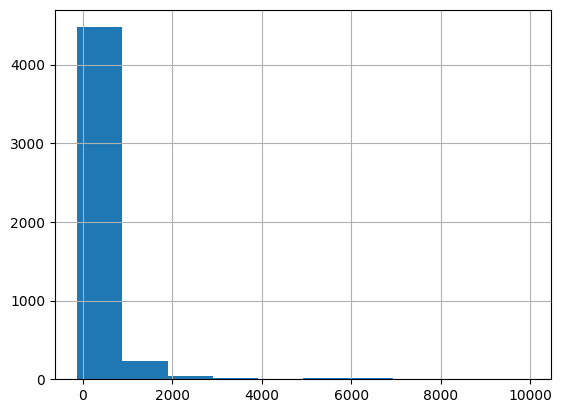

In [11]:
print(df["update_age(days)"].value_counts())
df["update_age(days)"].hist()

In [10]:
df["Label"].value_counts()

Label
1    2555
0    2244
Name: count, dtype: int64

In [6]:
df.duplicated().sum()

103

Data Visualization

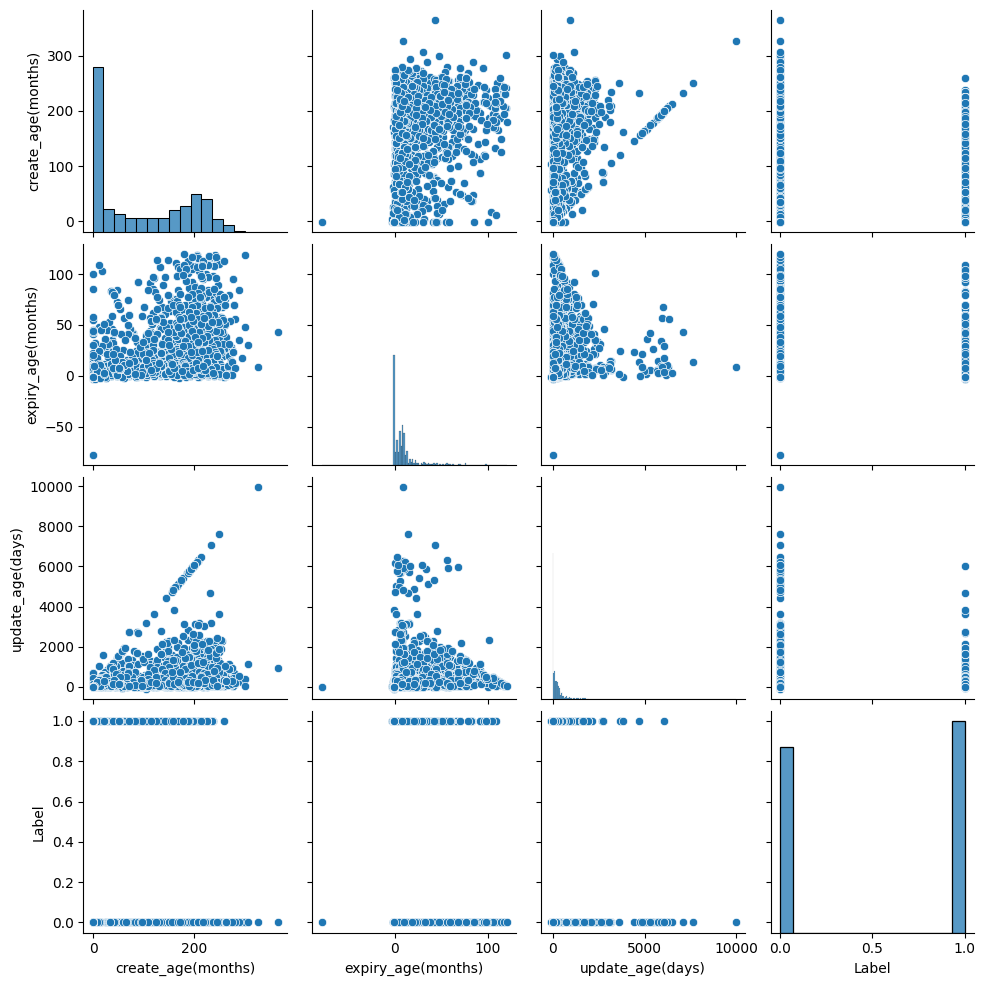

In [13]:
sns.pairplot(df)


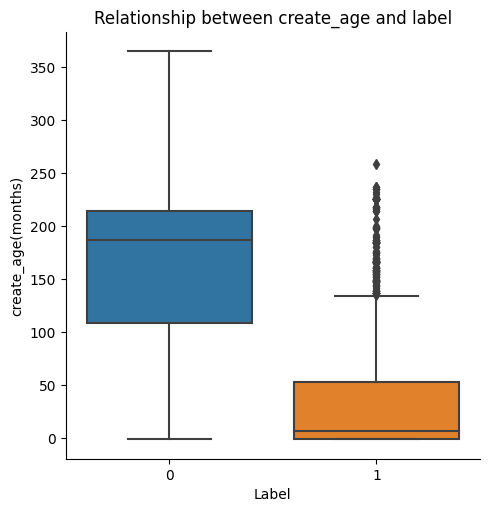

In [24]:
# Correlation between create_age and label
sns.catplot(y="create_age(months)", x="Label", data=df, kind="box")
plt.title("Relationship between create_age and label")
plt.show()

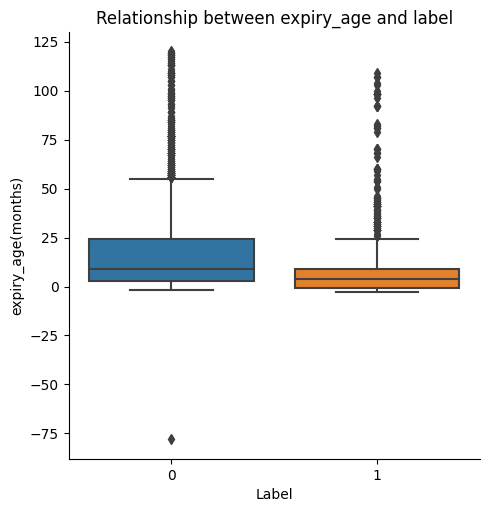

In [25]:
# Correlation between expiry_age and label
sns.catplot(y="expiry_age(months)", x="Label", data=df, kind="box")
plt.title("Relationship between expiry_age and label")
plt.show()

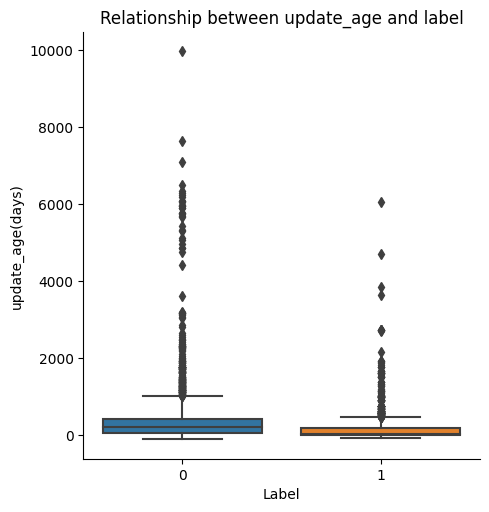

In [26]:
# Correlation between update_age and label
sns.catplot(y="update_age(days)", x="Label", data=df, kind="box")
plt.title("Relationship between update_age and label")
plt.show()

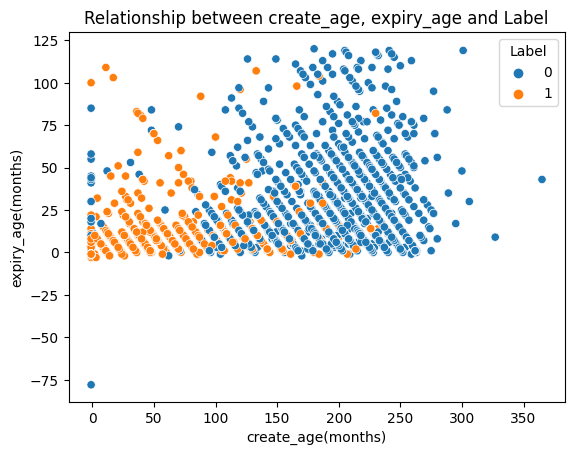

In [28]:
sns.scatterplot(x="create_age(months)", y="expiry_age(months)", hue="Label", data=df)
plt.title("Relationship between create_age, expiry_age and Label")
plt.show()

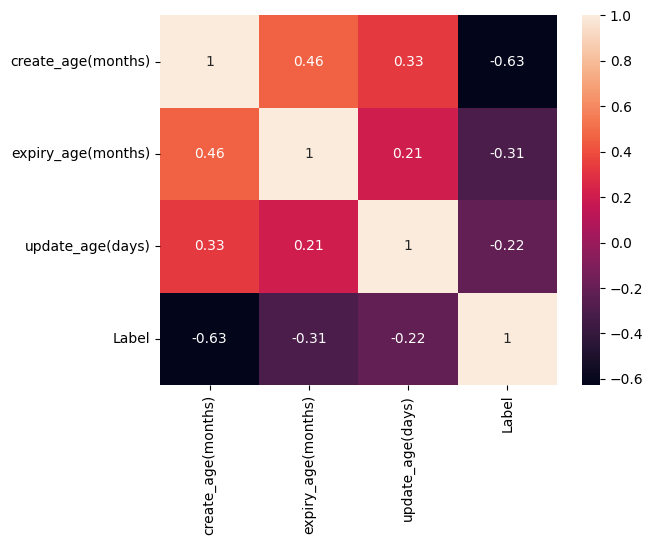

In [36]:
correlation_matrix = df.drop(['URL'], axis=1).corr()
heatmap = sns.heatmap(correlation_matrix,
                 annot=True,
                 yticklabels=df.drop(['URL'], axis=1).columns, 
                 xticklabels=df.drop(['URL'], axis=1).columns)
plt.show()